In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode




In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

heart = pd.read_csv(url, header=None, names=columns)

heart = heart.replace("?", pd.NA).dropna()
heart = heart.astype(float)
X = heart.iloc[:, :-1]  
y = heart.iloc[:, -1].apply(lambda x: 1 if x > 0 else 0)  # 0 for no disease, 1 for disease


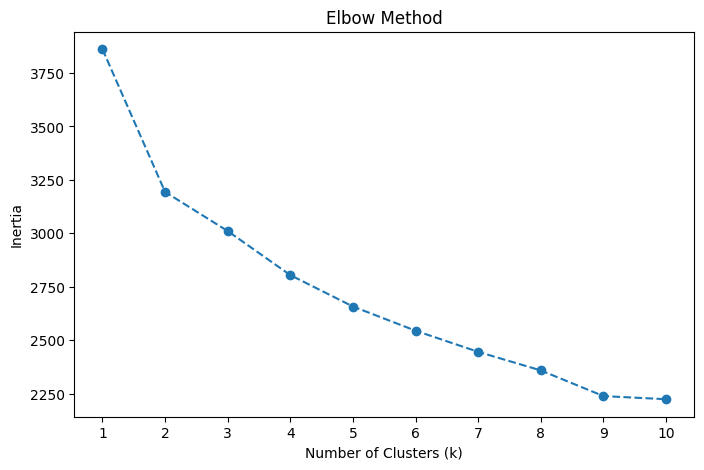

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

inertias = []
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2)
y_pred = kmeans.fit_predict(X)


Accuracy: 0.83
(ARI): 0.44


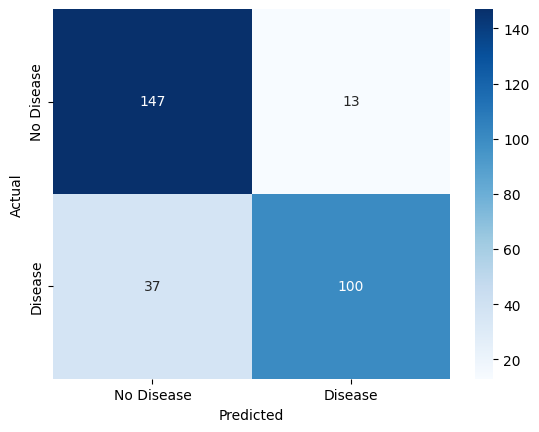

In [46]:
labels = np.zeros_like(y_pred)
for i in range(2):  
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]
    
    
accuracy = accuracy_score(y, labels)
ari = adjusted_rand_score(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"(ARI): {ari:.2f}")
conf_matrix = confusion_matrix(y, labels)
class_names = ['No Disease', 'Disease']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

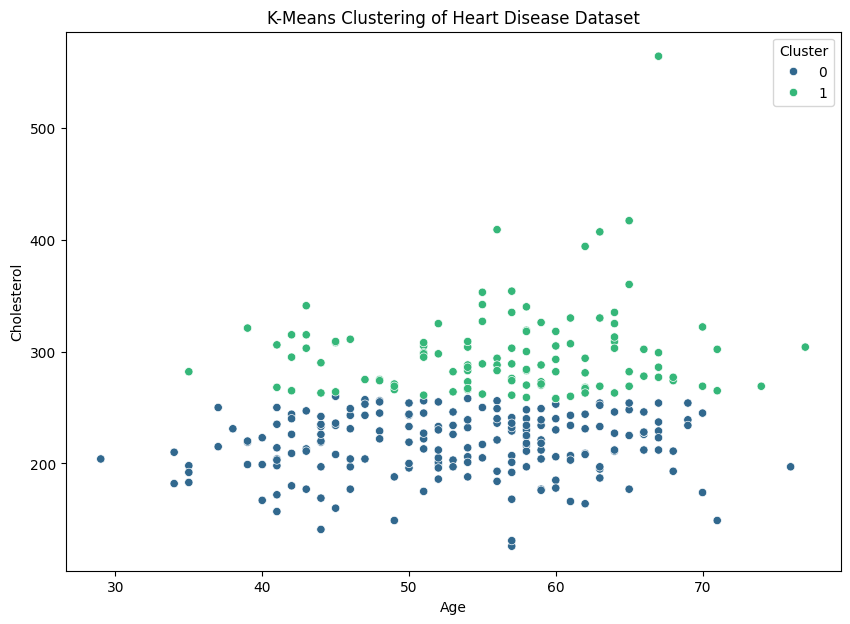

In [51]:
df = pd.DataFrame(X, columns=heart.columns[:-1])
df['Cluster'] = y_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='chol', hue='Cluster', palette='viridis', data=df, legend='full')
plt.title('K-Means Clustering of Heart Disease Dataset')
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

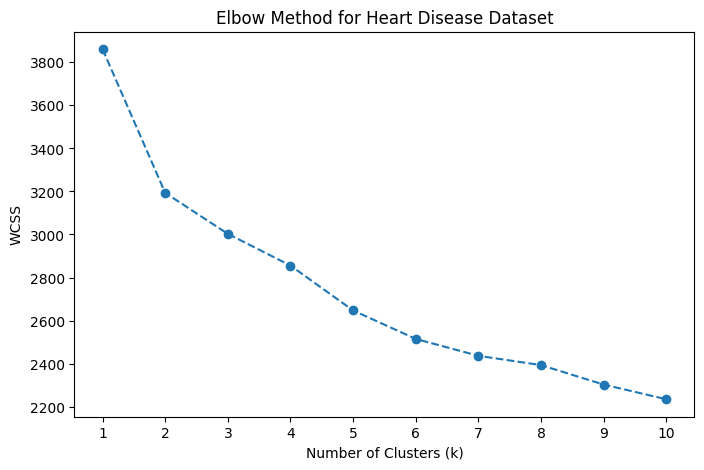

Accuracy: 0.83
Adjusted Rand Index (ARI): 0.44


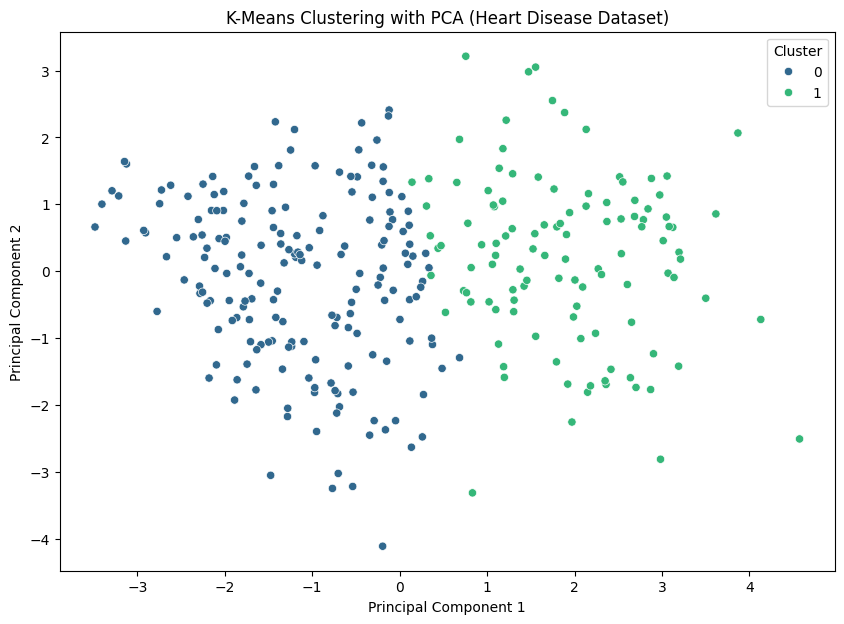

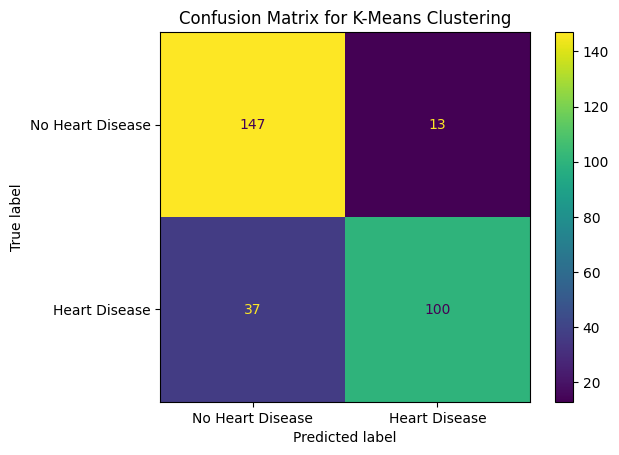

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode

# Load the dataset (update the path to your dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, header=None, names=columns)

# Handle missing values (replace '?' with NaN and drop rows with missing data)
data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True)

# Separate features and labels
X = data.iloc[:, :-1].astype(float).values  # Features (all columns except target)
y = data["target"].values  # Target labels

# Binary classification (convert target > 0 to 1 for heart disease)
y = (y > 0).astype(int)

# Standardize the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Heart Disease Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.show()

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Map cluster labels to match true labels
labels = np.zeros_like(y_pred)
for i in range(2):  # Number of clusters
    mask = (y_pred == i)
    labels[mask] = mode(y[mask])[0]

# Evaluate Clustering
accuracy = accuracy_score(y, labels)
ari = adjusted_rand_score(y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA-transformed data and clusters
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = y_pred

# Plot clusters in PCA space
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette='viridis',
    data=df_pca,
    legend='full'
)
plt.title('K-Means Clustering with PCA (Heart Disease Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster", loc='upper right')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y, labels)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix for K-Means Clustering')
plt.show()
